# Exploratory Data Analysis

In [30]:

import os
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def fileCounter(directory: str):
    lst = os.listdir(directory)
    fileCount = len(lst)
    
    return fileCount

In [32]:
trainingPizzaPath = 'pizza-notpizza/train/pizza'
trainingNotPizzaPath = 'pizza-notpizza/train/not_pizza'

validationPizzaPath = 'pizza-notpizza/val/pizza'
validationNotPizzaPath = 'pizza-notpizza/val/not_pizza'

testingPizzaPath = 'pizza-notpizza/test/pizza'
testingNotPizzaPath = 'pizza-notpizza/test/not_pizza'

In [33]:
trainPizzaCount = fileCounter(trainingPizzaPath)
trainNotPizzaCount = fileCounter(trainingNotPizzaPath)

training = [trainPizzaCount, trainNotPizzaCount]
training

[786, 786]

In [34]:
valPizzaCount = fileCounter(validationPizzaPath)
valNotPizzaCount = fileCounter(validationNotPizzaPath)

validation = [valPizzaCount, valNotPizzaCount]
validation

[98, 98]

In [35]:
testPizzaCount = fileCounter(testingPizzaPath)
testNotPizzaCount = fileCounter(testingNotPizzaPath)

testing = [testPizzaCount, testNotPizzaCount]
testing

[99, 99]

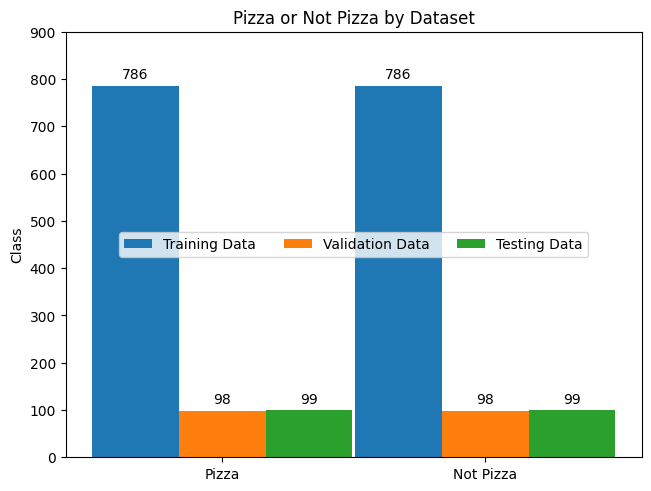

In [36]:
classes = ['Pizza', 'Not Pizza']
classesCount = {
    'Training Data': training,
    'Validation Data': validation,
    'Testing Data': testing
}

x = np.arange(len(classes))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for dataset, eachClassCount in classesCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, eachClassCount, width, label = dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Quantity')
ax.set_ylabel('Class')
ax.set_title('Pizza or Not Pizza by Dataset')
ax.set_xticks(x + width, classes)
ax.legend(loc = 'center', ncols = 3)
ax.set_ylim(0, 900)

plt.show()

# First attepmt to train
- Lasso Regularization
- CNN Network
- 3 x 256 x 256 input size

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
from torchvision.transforms import v2

import torchmetrics as metrics

from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image